In [1]:
import pandas as pd
import geopandas as gpd

csv_text = "Finance_Parking_Fines_2020-2025.csv"
address_test = "Baltimore_Address_Geocode.csv"

df = pd.read_csv(csv_text)
df_address_geo = pd.read_csv(address_test)

C:\Users\joelw\AppData\Local\Temp\ipykernel_4628\2151336704.py:7: DtypeWarning: Columns (2,3,16,21,22,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_text)


In [2]:
#import CSV files of blocks with geo codes. Then convert it to a shape file

In [3]:
gdf_address = gpd.GeoDataFrame(df_address_geo, 
                              geometry=gpd.points_from_xy(df_address_geo.longitude, df_address_geo.latitude),
                              crs="EPSG:4326"
                             ).to_crs("EPSG:2248")

In [4]:
print(gdf_address.head())

              Address   latitude  longitude                        geometry
0  400 E BALTIMORE ST  39.289875 -76.610023  POINT (1422710.876 591397.374)
1         400 BALT ST  39.289875 -76.610023  POINT (1422710.876 591397.374)
2    300 BALTIMORE ST  39.289832 -76.610554   POINT (1422560.68 591380.998)
3     300 E BALTIMORE  39.289832 -76.610554   POINT (1422560.68 591380.998)
4  200 E BALTIMORE ST  39.289788 -76.612048  POINT (1422137.782 591362.988)


In [5]:
import geopandas as gpd

url_neighborhoods = "Neighborhood_Statistical_Area_(NSA)_Boundaries/Neighborhood_Statistical_Area_(NSA)_Boundaries.shp"
url_police_districts = "Police_Districts/Police_Districts.shp"
url_council_districts = "Baltimore_City_Council_District/Baltimore_City_Council_District.shp"

gdf = gpd.read_file(url_neighborhoods, crs="EPSG:2248")#.to_crs("EPSG:2248")
gdf['Density'] = gdf['Population'] / gdf['Shape__Are']
gdf['Neighborhood'] = gdf['Name']

gdf_police = gpd.read_file(url_police_districts, crs="EPSG:2248")
gdf_police['Pol_Dist_Name'] = gdf_police['Dist_Name']
gdf_police['Pol_District'] = gdf_police['District']

gdf_council = gpd.read_file(url_council_districts, crs="EPSG:2248")
gdf_council['CouncilDistrict'] = gdf_council['AREA_NAME']

C:\Users\joelw\anaconda3\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(
C:\Users\joelw\anaconda3\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(
C:\Users\joelw\anaconda3\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver ESRI Shapefile does not support open option CRS
  return ogr_read(


In [6]:
gdf_police

,OBJECTID,DistrictNu,Dist_Abbr,Dist_Alt,Dist_Name,DistrictNa,District,Shape__Are,Shape__Len,geometry,Pol_Dist_Name,Pol_District
0,1,7,WD,WESTERN,Western,Western,7,1.038322e+08,52080.195708,"POLYGON ((1411199.267 602326.348, 1411322.608 ...",Western,7
1,2,2,SED,SOUTHEASTERN,Southeastern,Southeastern,2,3.411924e+08,111808.900155,"POLYGON ((1445386.023 600972.424, 1445389.88 6...",Southeastern,2
2,3,6,NWD,NORTHWESTERN,Northwestern,Northwestern,6,3.564826e+08,113851.640388,"POLYGON ((1410977.263 617045.445, 1410986.199 ...",Northwestern,6
3,4,1,CD,CENTRAL,Central,Central,1,8.831714e+07,54916.849787,"POLYGON ((1420500.622 597960.483, 1420515.504 ...",Central,1
4,5,3,ED,EASTERN,Eastern,Eastern,3,1.488800e+08,76683.824233,"POLYGON ((1436119.885 605682.235, 1436185.395 ...",Eastern,3
5,6,5,ND,NORTHERN,Northern,Northern,5,3.354991e+08,106824.037801,"POLYGON ((1419610.563 621282.212, 1422666.272 ...",Northern,5
6,7,9,SD,SOUTHERN,Southern,Southern,9,6.296923e+08,126783.456795,"POLYGON ((1418878.007 590043.53, 1418894.895 5...",Southern,9
7,8,4,NED,NORTHEASTERN,Northeastern,Northeastern,4,3.796311e+08,102580.898067,"POLYGON ((1445298.752 621403.938, 1445311.545 ...",Northeastern,4
8,9,8,SWD,SOUTHWESTERN,Southwestern,Southwestern,8,1.788709e+08,75092.065140,"POLYGON ((1394994.113 596176.145, 1394998.761 ...",Southwestern,8


In [7]:
joined_gdf = gpd.sjoin(gdf_address[['geometry', 'Address']], gdf[['Neighborhood','geometry']], how='left', predicate='within').drop("index_right", axis=1)
joined_gdf = gpd.sjoin(joined_gdf, gdf_police[['Pol_Dist_Name','Pol_District','geometry']], how='left', predicate='within').drop("index_right", axis=1)
joined_gdf = gpd.sjoin(joined_gdf, gdf_council[['CouncilDistrict','geometry']], how='left', predicate='within').drop("index_right", axis=1)

In [8]:
joined_gdf.head()

,geometry,Address,Neighborhood,Pol_Dist_Name,Pol_District,CouncilDistrict
0,POINT (1422710.876 591397.374),400 E BALTIMORE ST,Downtown,Central,1,11
1,POINT (1422710.876 591397.374),400 BALT ST,Downtown,Central,1,11
2,POINT (1422560.68 591380.998),300 BALTIMORE ST,Downtown,Central,1,11
3,POINT (1422560.68 591380.998),300 E BALTIMORE,Downtown,Central,1,11
4,POINT (1422137.782 591362.988),200 E BALTIMORE ST,Downtown,Central,1,11


In [9]:
joined_gdf.to_csv("Block_data.csv")

In [10]:
gdf.columns

Index(['OBJECTID', 'Name', 'Population', 'White', 'Blk_AfAm', 'AmInd_AkNa',
       'Asian', 'NatHaw_Pac', 'Other_Race', 'TwoOrMore', 'Hisp_Lat', 'Male',
       'Female', 'Total_Unit', 'Occ_Occupi', 'Occ_Vacant', 'Tenure_Own',
       'Tenure_Ren', 'Vacant_For', 'Vacant_F_1', 'Vacant_Oth', 'HH_Total',
       'HH_Family', 'HH_Married', 'HH_OtherFa', 'HH_Male_No', 'HH_Female_',
       'HH_NonFami', 'HH_NonFa_1', 'HH_NonFa_2', 'HH18_With1', 'HH18_Famil',
       'HH18_NonFa', 'HH18_No18', 'HH18_Fam_1', 'HH18_Non_1', 'Age_U5',
       'Age_5_9', 'Age_10_14', 'Age_15_17', 'Age_18_21', 'Age_22_24',
       'Age_25_29', 'Age_30_34', 'Age_35_39', 'Age_40_44', 'Age_45_49',
       'Age_50_54', 'Age_55_59', 'Age_60_64', 'Age_65_69', 'Age_70_74',
       'Age_75_79', 'Age_80_84', 'Age_85up', 'Med_Age', 'Med_Age_Ma',
       'Med_Age_Fe', 'Shape__Are', 'Shape__Len', 'geometry', 'Density',
       'Neighborhood'],
      dtype='object')

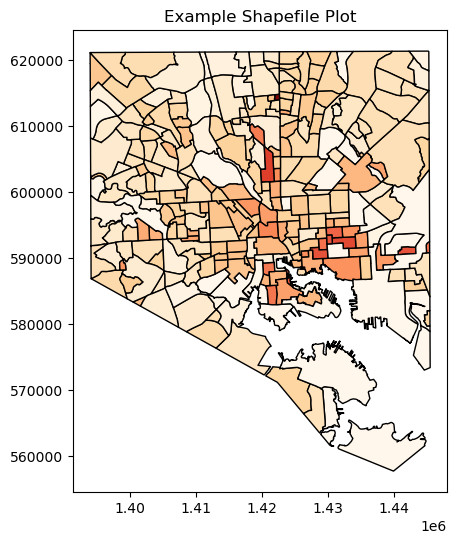

In [11]:
import matplotlib.pyplot as plt

#gdf_address.plot(marker='o', color='red', markersize=5, label='Cities')
gdf.plot(column="Density", figsize=(10, 6), edgecolor='black', cmap='OrRd')
plt.title("Example Shapefile Plot")
plt.show()

import pandas as pd
import os

def combine_csv_files(directory, output_file):
    """Combines all CSV files in a directory into a single CSV file.

    Args:
        directory (str): The path to the directory containing the CSV files.
        output_file (str): The path to the output CSV file.
    """
    all_files = os.listdir(directory)
    csv_files = [f for f in all_files if f.endswith('.csv')]

    all_df = []
    csv_list = []
    for csv_file in csv_files:
        file_path = os.path.join(directory, csv_file)
        csv_list.append(csv_file)
        df = pd.read_csv(file_path)
        all_df.append(df)

    combined_df = pd.concat(all_df, ignore_index=True)
    print(csv_list)
    combined_df.to_csv(output_file, index=False)

# Example usage
directory_path = 'Geocodes/'
output_file_path = 'combined_data_test.csv'
combine_csv_files(directory_path, output_file_path)

In [13]:
csv_cam = 'Exported DF/speed_camera_df.csv'
csv_pen_des = 'Exported DF/ViolFine 2020-2025 Desc.csv'
csv_pen = 'Exported DF/sum_penalty_df.csv'
csv_neigh = 'Exported DF/sum_penalty_neigh_df.csv'

df_cam = pd.read_csv(csv_cam)
df_pen_des = pd.read_csv(csv_pen_des)
df_pen = pd.read_csv(csv_pen)
df_neigh = pd.read_csv(csv_neigh)

In [14]:
df_cam

,Address,Location,latitude,longitude,sum(ViolFine),sum(OpenFine),sum(OpenPenalty),sum(Balance),RevenueCollected,PctNotPaid,Unnamed: 10,Unnamed: 11
0,E/S 3300 POWHATAN AVE,NaN,39.320767,-76.673859,40,40,0,40,0,100.000000,NaN,NaN
1,4800 BLK WALTHER AVE NB,NaN,39.342376,-76.562749,840,800,0,800,40,95.238095,NaN,NaN
2,5201 HILLEN RD NB,NaN,39.352095,-76.583952,2760,2560,0,2560,200,92.753623,NaN,NaN
3,5257 HILLEN RD SB,NaN,39.325874,-76.568367,6000,5320,0,5320,680,88.666667,NaN,NaN
4,3900 BLK BELAIR RD NB,NaN,39.330147,-76.694789,40880,29420,0,29450,11460,71.966732,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
210,7000 BLK PARKHEIGHTS AV NB,NaN,39.344700,-76.689200,352400,42640,0,42706,309760,12.099886,NaN,NaN
211,100 BLK W LAKE AVE WB,NaN,39.328060,-76.579242,580760,58852,0,58882,521908,10.133618,NaN,NaN
212,100 BLK W LAKE AVE EB,NaN,39.328060,-76.579242,1227520,120770,0,120830,1106750,9.838536,NaN,NaN
213,100 BLK W UNIVERSITY PARKWAY E,NaN,39.334734,-76.620772,1440,80,0,80,1360,5.555556,NaN,NaN


In [15]:
df_pen_des['Year'] = df_pen_des['Year'].astype(int)
df_pen_des.set_index('Year', inplace=True)
df_pen_des[:5]

,Fixed Speed Camera,Red Light Violation,No Stop/Park Street Cleaning,All Other Parking Meter Violations,No Parking/Standing In Bus Stop/Bus Lane,No Stopping/Standing Tow Away Zone,No Stopping/Standing Not Tow-Away Zone,Residential Parking Permit Only,Abandonded Vehicle,Expired Tags,...,No Parking/Standing In Transit Stop,No Parking/Standing Vendor Truck,Blocking Garage or Driveway,No Parking/Stand Motor Home/Campr/Travel Trailer,In Taxicab Stand,No Stop/Stand/Park Cruising,Res. Park Permit 2nd Offense,No Stopping or No Parking Pimlico Event,Res. Park Permit 3rd Offense,Truck Overheight Warning Notice
Year,,,,,,,,,,,,,,,,,,,,,
2020,23893520,8191875,569348,2000672,1556352,789880,1060352,857116,252170,288640,...,26873,1506,11840,2772,1248,924,1944,204,510,0
2021,17313440,12346875,1976,2777536,1788192,1547988,1321792,1249092,836238,1232576,...,24486,2510,9728,5292,2848,770,1080,102,408,0
2022,20829280,11594250,1514136,2437696,1570968,1814748,1137440,1296932,820836,2537920,...,22484,1506,8384,3276,1952,770,360,2856,306,0
2023,21103480,9472125,2693912,1854080,1363068,1601652,960480,1141348,900564,1306976,...,13475,1506,7328,5544,3648,1078,216,612,510,0
2024,16984400,11235300,2484248,1560384,1433628,1335516,927168,896636,816608,712608,...,11781,9538,6880,4536,2528,1078,864,816,204,0


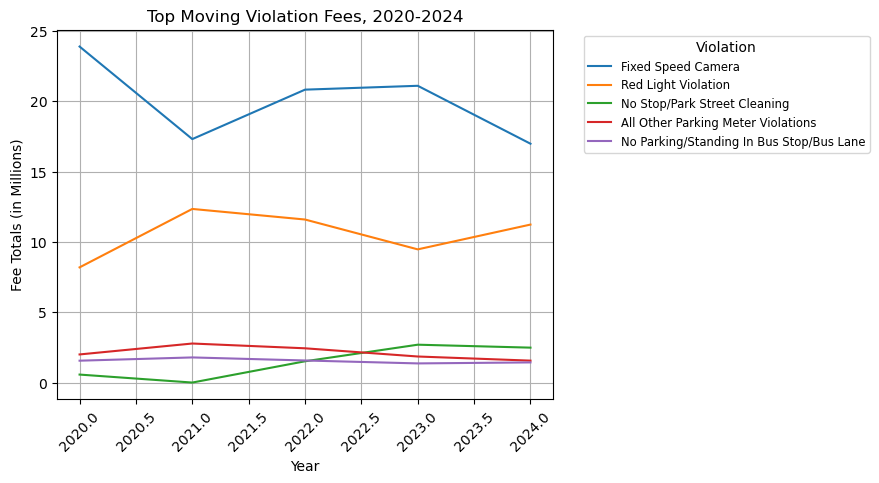

In [16]:
top_five = ['Fixed Speed Camera', 'Red Light Violation', 'No Stop/Park Street Cleaning', 'All Other Parking Meter Violations', 'No Parking/Standing In Bus Stop/Bus Lane']
ax = (df_pen_des[top_five][:5] / 1000000).plot(title='Top Moving Violation Fees, 2020-2024', legend=False)
ax.set_xlabel('Year')
ax.set_ylabel('Fee Totals (in Millions)')
ax.legend(title='Violation', fontsize='small', title_fontsize='medium', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.show()

ax.get_figure().savefig('Graphs/Top Moving Violations 2020-2025.png')

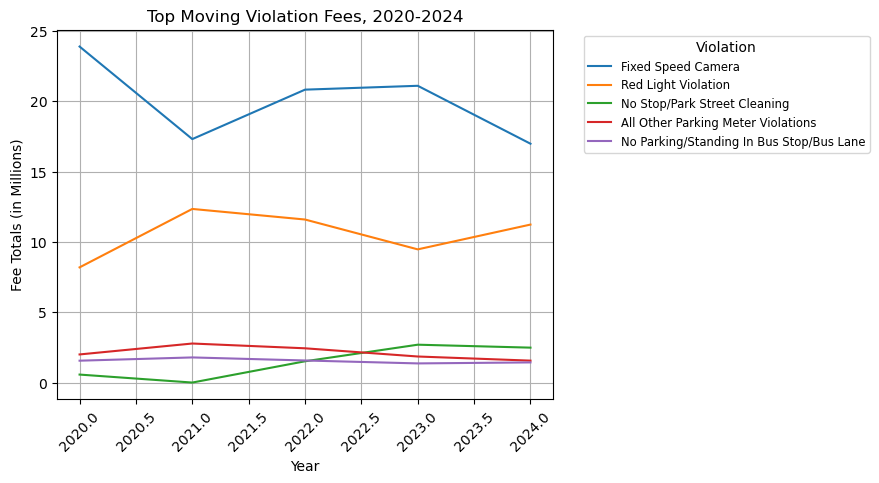

In [17]:

ax = (df_pen_des[top_five][:5] / 1000000).plot(title='Top Moving Violation Fees, 2020-2024', legend=False)
ax.set_xlabel('Year')
ax.set_ylabel('Fee Totals (in Millions)')
ax.legend(title='Violation', fontsize='small', title_fontsize='medium', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.grid(True)
plt.xticks(rotation=45)
plt.show()

ax.get_figure().savefig('Graphs/Top Moving Violations 2020-2025.png')

In [18]:
cols = ['TotalViolFine', 'TotalBalance', 'TotalOpenFine', 'TotalOpenPenalty']
df_pen[cols] = df_pen[cols].replace('[\$,]', '', regex=True).astype(float) /1000000
df_pen['Paid'] = df_pen['TotalViolFine'] - df_pen['TotalOpenFine']

df_pen

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\joelw\AppData\Local\Temp\ipykernel_4628\680919037.py:2: SyntaxWarning: invalid escape sequence '\$'
  df_pen[cols] = df_pen[cols].replace('[\$,]', '', regex=True).astype(float) /1000000


,Year,TotalViolFine,TotalBalance,TotalOpenFine,TotalOpenPenalty,Paid
0,2020,49.535352,16.289034,12.540424,3.718407,36.994928
1,2021,52.157990,20.498092,14.526740,5.835223,37.631250
2,2022,61.277234,25.676447,15.275303,8.546001,46.001931
3,2023,58.250002,24.815683,14.817659,7.469936,43.432343
4,2024,48.613064,24.155999,16.216728,5.570316,32.396336
5,2025,12.038712,7.629648,6.576599,0.225075,5.462113


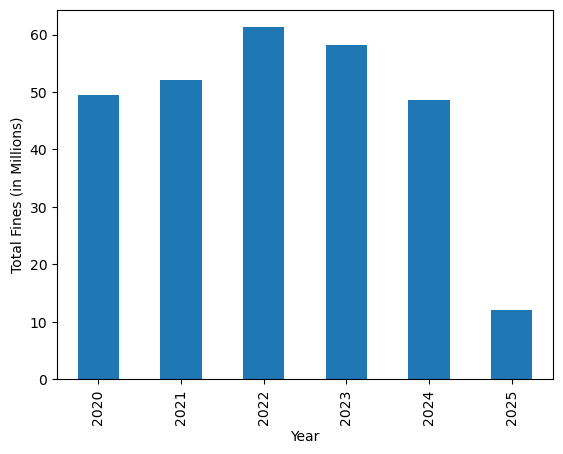

In [19]:


ax = df_pen.set_index('Year')['TotalViolFine'].plot(kind='bar', stacked=True)

plt.xlabel('Year')
plt.ylabel('Total Fines (in Millions)')
plt.show()

ax.get_figure().savefig('Graphs/Total Fines 2020-2025.png')

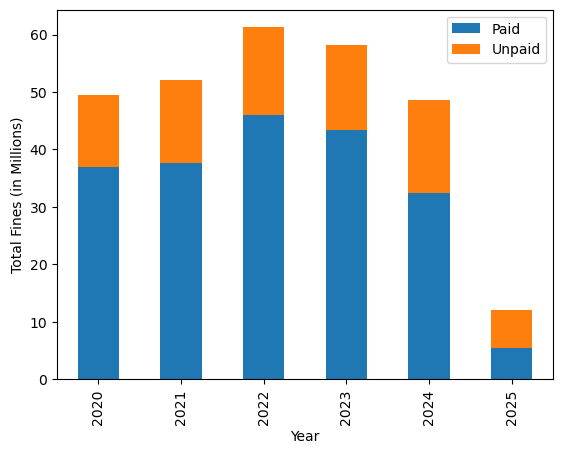

In [20]:

df_pen['Unpaid'] = df_pen['TotalOpenFine']

ax = df_pen.set_index('Year')[['Paid', 'Unpaid']].plot(kind='bar', stacked=True)

plt.xlabel('Year')
plt.ylabel('Total Fines (in Millions)')
plt.show()

ax.get_figure().savefig('Graphs/Total Fines Paid Unpaid 2020-2025.png')

In [21]:
df_neigh

,Year,null_TotalViolFine,null_TotalOpenFine,Abell_TotalViolFine,Abell_TotalOpenFine,Allendale_TotalViolFine,Allendale_TotalOpenFine,Arcadia_TotalViolFine,Arcadia_TotalOpenFine,Arlington_TotalViolFine,...,Wrenlane_TotalViolFine,Wrenlane_TotalOpenFine,Wyman Park_TotalViolFine,Wyman Park_TotalOpenFine,Wyndhurst_TotalViolFine,Wyndhurst_TotalOpenFine,Yale Heights_TotalViolFine,Yale Heights_TotalOpenFine,York-Homeland_TotalViolFine,York-Homeland_TotalOpenFine
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020.0,22187593.0,5817516.0,19773.0,3685.0,15891.0,5661.0,5926.0,2188.0,12017.0,...,854.0,430.0,6811.0,368.0,2860.0,244.0,4055.0,1929.0,441.0,0.0
2,2021.0,23984838.0,6899787.0,46945.0,9636.0,31382.0,17247.0,7921.0,3455.0,17670.0,...,1635.0,1430.0,12442.0,1525.0,3379.0,173.0,14042.0,6935.0,NaN,NaN
3,2022.0,28558872.0,6046948.0,55891.0,9241.0,71809.0,28925.0,7025.0,3585.0,20005.0,...,1908.0,1396.0,22085.0,4482.0,12177.0,852.0,21773.0,10689.0,613.0,465.0
4,2023.0,25891600.0,4952391.0,41204.0,11293.0,62850.0,25089.0,6748.0,3371.0,14792.0,...,1020.0,860.0,24821.0,10018.0,1377.0,32.0,9824.0,6319.0,1420.0,522.0
5,2024.0,22351354.0,6034714.0,24013.0,8540.0,53848.0,29940.0,10057.0,5671.0,9332.0,...,2086.0,1181.0,25750.0,7658.0,1836.0,96.0,14422.0,6869.0,77.0,0.0
6,2025.0,5445793.0,2404415.0,7329.0,5345.0,8247.0,6827.0,3003.0,2843.0,3906.0,...,332.0,268.0,6477.0,4718.0,1328.0,1024.0,2335.0,2031.0,336.0,336.0


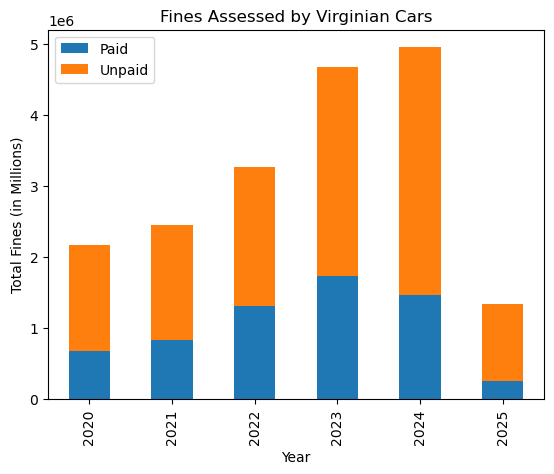

In [22]:
csv_VA = 'Exported DF/Virginia.csv'

df_VA = pd.read_csv(csv_VA)

#Scale
df_VA["Unpaid"] = df_VA["TotalOpenFine"]


ax = df_VA.sort_values('Year').set_index('Year')[['Paid', 'Unpaid']].plot(kind='bar', stacked=True)

plt.xlabel('Year')
plt.ylabel('Total Fines (in Millions)')
plt.title('Fines Assessed by Virginian Cars')
plt.show()

ax.get_figure().savefig('Graphs/Virginia.png')

In [23]:
csv_NH = 'Exported DF/Neighborhoods_2024.csv'

df_NH = pd.read_csv(csv_NH)
df_NH["Unpaid"] = df_NH["TotalOpenFine"]

gdf = gdf.set_index('Name')
df_NH = df_NH.set_index('Neighborhood')
#gdf = gdf.join(
gdf = gdf.join(df_NH, on='Neighborhood', how='left').drop("Neighborhood", axis=1)

In [24]:
gdf['AdjustedPopulation'] = gdf['Population'].clip(lower=400)

In [25]:
gdf['FeesPerCapita'] = gdf['TotalViolFine'] / (gdf['AdjustedPopulation'])
gdf['FeesPerCapita'].sort_values(ascending=False).head(40)

Name
Pulaski Industrial Area         7319.037500
Dunbar-Broadway                 4016.348465
Clifton Park                    3628.397500
Hopkins Bayview                 3444.435000
Mayfield                        2562.038462
Liberty Square                  2559.135572
Coldspring                      2556.229242
Hanlon-Longwood                 2049.067857
Inner Harbor                    2032.695000
Original Northwood              1801.671861
Locust Point Industrial Area    1731.650000
University of Maryland          1548.514950
Canton Industrial Area          1464.460000
Towanda-Grantley                1405.786437
Seton Hill                      1322.469442
Rognel Heights                  1308.609121
Stadium/Entertainment Area      1138.787500
Mt Pleasant Park                1102.612500
Edmondson Village                966.300384
Fells Point                      951.498831
Downtown                         944.038628
Shipley Hill                     924.153846
Ridgely's Delight          

In [26]:
import numpy as np
gdf['LogFeesPerCapita'] = np.log10(gdf['FeesPerCapita'].replace(0, np.nan))

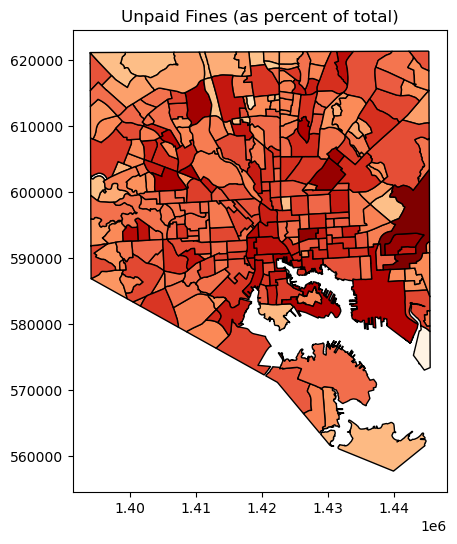

In [27]:
gdf.plot(column="LogFeesPerCapita", figsize=(10, 6), edgecolor='black', cmap='OrRd')
plt.title("Unpaid Fines (as percent of total)")
plt.show()

In [28]:
gdf['PctNotPaid'] = gdf['PctNotPaid'].clip(lower=9, upper= 70)
gdf['PctPaid'] = 100 - gdf['PctNotPaid'].clip(lower=9, upper= 70)

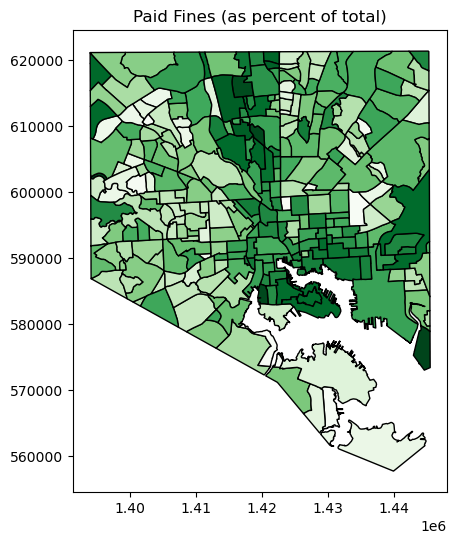

In [29]:
ax = gdf.plot(column="PctPaid", figsize=(10, 6), edgecolor='black', cmap='Greens')
plt.title("Paid Fines (as percent of total)")
plt.show()

ax.get_figure().savefig('Graphs/Paid Fines.png')

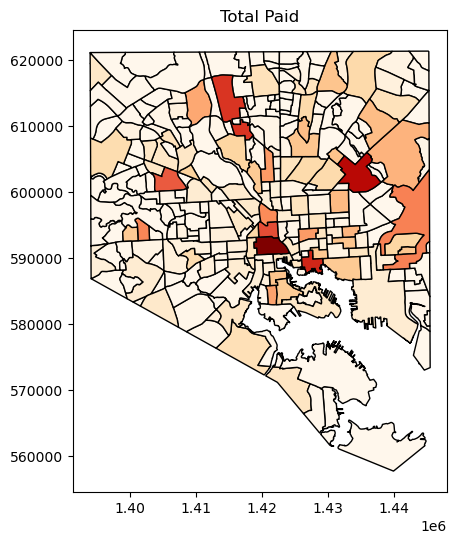

In [30]:
gdf.plot(column="TotalPaid", figsize=(10, 6), edgecolor='black', cmap='OrRd')
plt.title("Total Paid")
plt.show()

In [31]:
gdf['PctBlack'] = 100 * gdf['Blk_AfAm'] / (gdf['Population']+1)
gdf['PctNotBlack'] = 100 - gdf['PctBlack']

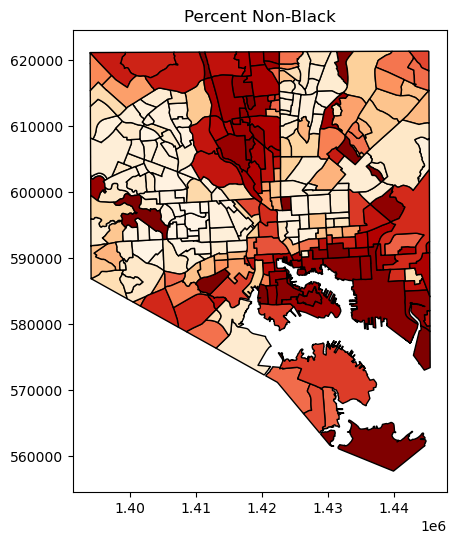

In [32]:
ax =  gdf.plot(column="PctNotBlack", figsize=(10, 6), edgecolor='black', cmap='OrRd')
plt.title("Percent Non-Black")
plt.show()

ax.get_figure().savefig('Graphs/Non-Black Distribution Map.png')

C:\Users\joelw\anaconda3\Lib\site-packages\pyogrio\raw.py:198: RuntimeWarning: driver CSV does not support open option CRS
  return ogr_read(


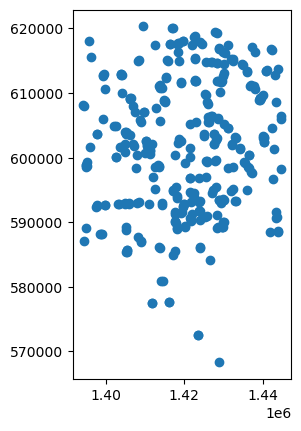

In [100]:
csv_sc = 'Exported DF/speed_camera_df.csv'

df_SC = pd.read_csv(csv_sc)
#gdf_SC = gpd.read_file('Camera_Locations', crs="EPSG:4326")
Camera_Locations = gpd.read_file('Camera_Locations.csv', crs="EPSG:4326")


Camera_Locations = gpd.GeoDataFrame(Camera_Locations, 
                              geometry=gpd.points_from_xy(Camera_Locations.X, Camera_Locations.Y),
                              crs="EPSG:4326"
                             )
Camera_Locations.plot()
plt.show()

In [34]:
Camera_Locations

#df_SC_merged = pd.merge(df_SC, Camera_Locations[['geometry', 'Location']].to_upper(), left_on ='Address', right_on = 'Location')

,X,Y,OBJECTID,GIS_ID,CamType,CamID,Quadrant,DisttNo,Location,City,Status,Contact,Email,X_Cord,Y_Cord,geometry
0,1407967.59,600409.6019,1,5001,Speed Camera Portable,3,2,7,2700 Blk Gywnns Falls Pkwy WB,Baltimore,Final,Phillip Mellerson,phillip.mellerson@baltimorecity.gov,1407967.59,600409.6019,POINT (1407967.59 600409.602)
1,1418421.922,602222.4477,2,5003,Speed Camera Portable,3,2,12,500 Blk West 28th St EB,Baltimore,Final,Phillip Mellerson,phillip.mellerson@baltimorecity.gov,1418421.922,602222.4477,POINT (1418421.922 602222.448)
2,1435350.473,599210.8707,3,5005,Speed Camera Portable,3,4,13,4300 Blk Erdman Ave NB,Baltimore,Final,Phillip Mellerson,phillip.mellerson@baltimorecity.gov,1435350.473,599210.8707,POINT (1435350.473 599210.871)
3,1437866.392,616407.254,4,5006,Speed Camera Portable,3,1,3,6100 Blk Harford Rd NBÂ Â Â Â Â Â Â Â Â Â Â Â ...,Baltimore,Final,Phillip Mellerson,phillip.mellerson@baltimorecity.gov,1437866.392,616407.254,POINT (1437866.392 616407.254)
4,1408108.777,587718.3947,5,5007,Speed Camera Portable,3,3,9,2800 Blk Frederick Ave EB,Baltimore,Final,Phillip Mellerson,phillip.mellerson@baltimorecity.gov,1408108.777,587718.3947,POINT (1408108.777 587718.395)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,1439254.88,609183.7999,343,1164,Red Light Camera,1,1,2,Belair Rd @ Frankford Ave WB,Baltimore,Final,Phillip Mellerson,phillip.mellerson@baltimorecity.gov,1439254.88,609183.7999,POINT (1439254.88 609183.8)
341,1430063.31,605193.4802,344,1179,Red Light Camera,1,1,12,Harford Rd @ Erdman Ave NB,Baltimore,Final,Phillip Mellerson,phillip.mellerson@baltimorecity.gov,1430063.31,605193.4802,POINT (1430063.31 605193.48)
342,1423667.54,593061.8299,345,1180,Red Light Camera,1,4,12,Gay St @ N Exeter St/Orelans St NB,Baltimore,Final,Phillip Mellerson,phillip.mellerson@baltimorecity.gov,1423667.54,593061.8299,POINT (1423667.54 593061.83)
343,1423657.5,593126.0499,346,1181,Red Light Camera,1,4,12,Orleans St @ Gay St EB,Baltimore,Final,Phillip Mellerson,phillip.mellerson@baltimorecity.gov,1423657.5,593126.0499,POINT (1423657.5 593126.05)


In [102]:
df_SC = gpd.GeoDataFrame(df_SC, 
                              geometry=gpd.points_from_xy(df_SC.longitude, df_SC.latitude,
                              crs="EPSG:4326"
                             )).to_crs("EPSG:2248")

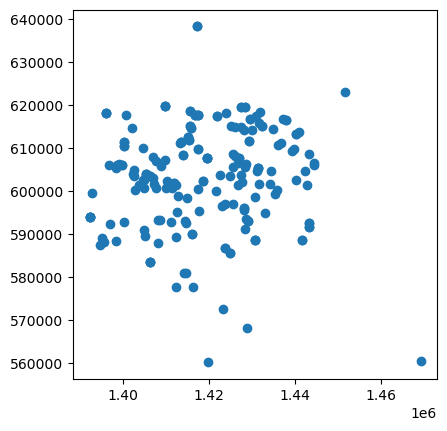

In [104]:
df_SC.plot()
plt.show()

In [106]:
df_SC[df_SC['sum(ViolFine)']>10000].tail(10)

,Address,Location,latitude,longitude,sum(ViolFine),sum(OpenFine),sum(OpenPenalty),sum(Balance),RevenueCollected,PctNotPaid,Unnamed: 10,Unnamed: 11,geometry
202,4600 BLK ROLAND AVE NB,NaN,39.345865,-76.636195,778400,112847,0,112917,665553,14.497302,NaN,NaN,POINT (1415222.002 611760.227)
203,5200 BLK N CHARLES ST SB,NaN,39.340500,-76.628200,585200,83472,0,83472,501728,14.263841,NaN,NaN,POINT (1417490.978 609815.103)
204,5000 BLK N CHARLES ST NB,NaN,39.340500,-76.628200,317960,45160,0,45200,272800,14.203044,NaN,NaN,POINT (1417490.978 609815.103)
205,4700 BLK ROLAND AVE SB,NaN,39.348090,-76.636401,1033560,146012,0,146042,887548,14.127095,NaN,NaN,POINT (1415160.544 612570.275)
206,5100 BLK ROLAND AVE SB,NaN,39.355026,-76.634836,1043720,145262,0,145306,898458,13.917717,NaN,NaN,POINT (1415592.91 615098.386)
208,5000 BLK ROLAND AVE NB,NaN,39.353474,-76.634378,661360,87031,0,87111,574329,13.159399,NaN,NaN,POINT (1415724.77 614533.609)
209,7000 BLK PARKHEIGHTS AV SB,NaN,39.344700,-76.689200,259360,32140,0,32140,227220,12.392042,NaN,NaN,POINT (1400232.975 611280.393)
210,7000 BLK PARKHEIGHTS AV NB,NaN,39.344700,-76.689200,352400,42640,0,42706,309760,12.099886,NaN,NaN,POINT (1400232.975 611280.393)
211,100 BLK W LAKE AVE WB,NaN,39.328060,-76.579242,580760,58852,0,58882,521908,10.133618,NaN,NaN,POINT (1431358.696 605344.035)
212,100 BLK W LAKE AVE EB,NaN,39.328060,-76.579242,1227520,120770,0,120830,1106750,9.838536,NaN,NaN,POINT (1431358.696 605344.035)


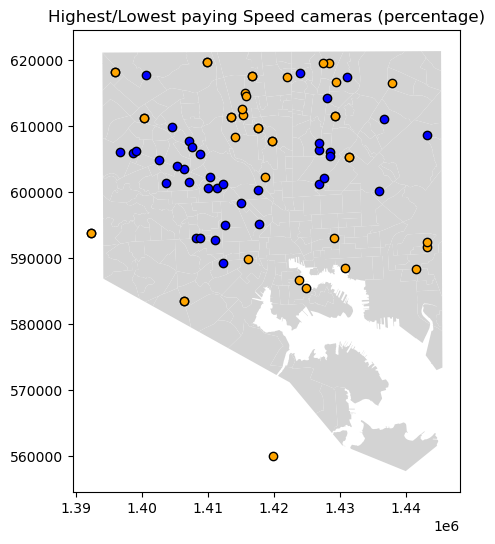

In [146]:
fig, ax = plt.subplots(figsize=(10, 6))

plt.title('Highest/Lowest paying Speed cameras (percentage)')
gdf.plot(ax=ax, color='lightgrey')
df_SC[df_SC['sum(ViolFine)']>10000].head(40).plot(ax=ax, color='blue',edgecolor='black')
df_SC[df_SC['sum(ViolFine)']>10000].tail(40).plot(ax=ax, color='orange', edgecolor='black')

plt.show()
ax.get_figure().savefig('Graphs/Speed Camera Percentages.png')

In [80]:
df_SC.crs

<Projected CRS: EPSG:2248>
Name: NAD83 / Maryland (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Maryland - counties of Allegany; Anne Arundel; Baltimore; Calvert; Caroline; Carroll; Cecil; Charles; Dorchester; Frederick; Garrett; Harford; Howard; Kent; Montgomery; Prince Georges; Queen Annes; Somerset; St Marys; Talbot; Washington; Wicomico; Worcester.
- bounds: (-79.49, 37.97, -74.97, 39.73)
Coordinate Operation:
- name: SPCS83 Maryland zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [78]:
gdf.crs

<Projected CRS: EPSG:2248>
Name: NAD83 / Maryland (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - Maryland - counties of Allegany; Anne Arundel; Baltimore; Calvert; Caroline; Carroll; Cecil; Charles; Dorchester; Frederick; Garrett; Harford; Howard; Kent; Montgomery; Prince Georges; Queen Annes; Somerset; St Marys; Talbot; Washington; Wicomico; Worcester.
- bounds: (-79.49, 37.97, -74.97, 39.73)
Coordinate Operation:
- name: SPCS83 Maryland zone (US survey foot)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich